<a href="https://colab.research.google.com/github/C0SS10/AI4ENG-II/blob/main/House-Price-Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📦 Módulos, archivos, paquetes importantes para la ejecución del notebook.**

In [ ]:
# Librerias uso básico
import numpy as np
import pandas as pd

# Librerias para gráficar
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias de Sklearn
from sklearn.model_selection import train_test_split

In [ ]:
import requests
from io import StringIO

url = 'https://drive.google.com/uc?export=download&id=1J_gjK0b1F9JkvlNEj-t8fiHcTA6K8fO2'

response = requests.get(url)
response.raise_for_status()
data_csv = StringIO(response.text)

Obteniendo el conjunto de datos desde Drive 🔽

## **🧰 Prepocesamiento de datos**

In [ ]:
house_data = pd.read_csv(data_csv).drop(['Unnamed: 0'], axis=1)

house_data.head()

,City,Price,Area,Location,No. of Bedrooms
0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,Bangalore,8358000,1675,Doddanekundi,3
4,Bangalore,6845000,1670,Kengeri,3


🤓 Leemos el archivo .csv y a su vez eliminamos la columna llamada 'Unnamed: 0' porque creemos que nos da información que no es importante/utilizable.

- 🏙️ La categoria 'City' proporciona información sobre los lugares de la india donde se ofertaron las casas.
- 💰 'Price' nos dice cuánto vale la casa en cuestión, el valor consideramos que está en Rupias (el dataset no ofrece información sobre la columna).
- 🏙 Luego está 'Area' es el espacio que ocupa la casa y está dado en pies cuadrados.
- 📮 'Location' nos da el nombre de la zona/barrio/municipio/dirección.
- 🛌 Por último está el número de dormitorios que tiene la casa.

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29135 entries, 0 to 29134
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             29135 non-null  object
 1   Price            29135 non-null  int64 
 2   Area             29135 non-null  int64 
 3   Location         29135 non-null  object
 4   No. of Bedrooms  29135 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


📄 Información adicional del objeto 'DataFrame', para saber cuales variables son categoricas o continuas.

In [ ]:
# Revisando si el dataset tiene valores nulos
house_data_nan = house_data.isnull().sum() * 100
house_data_nan

City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

❌ Vemos que el dataset no cuenta con datos nulos en ninguna de su columna. El resultado está en unidades de porcentaje.

In [ ]:
# Resumen estadistico del dataset, variables continuas
house_data.describe()

,Price,Area,No. of Bedrooms
count,2.913500e+04,29135.000000,29135.000000
mean,1.195267e+07,1301.816475,2.421074
std,2.387647e+07,767.862339,0.821016
min,2.000000e+06,200.000000,1.000000
25%,4.179999e+06,870.000000,2.000000
50%,6.884999e+06,1137.000000,2.000000
75%,1.230000e+07,1504.000000,3.000000
max,8.546000e+08,16000.000000,9.000000


- 💰La media de los precios es: 11952670₹ Rupias
- 💰La casa más cara tiene un valor de 854600000₹ Rupias
- 🏠El espacio medio que ocupa una casa es de 1301 pies cuadrados
- 🏠La casa más pequeña ocupa 200 pies cuadrados
- 🏠La vivienda más grande tiene 16000 pies cuadrados
- 🛌La media de habitaciones se encuentra en 2 habitaciones aproximadamente.

In [ ]:
# Resumen estadistico para variables categóricas
house_data.describe(include=['object'])

,City,Location
count,29135,29135
unique,6,1776
top,Mumbai,New Town
freq,6925,687


- 🖋️ En el dataset tenemos 29135 observaciones
- 📍 6 ciudades únicas y 1776 zonas/barrios
- 📍 La ciudad que más se repite es Mumbai con 6925 observaciones
- 🖋️ El barrio/zona de New Town tiene 687 observaciones asociadas.

## **👀 Exploración de datos**

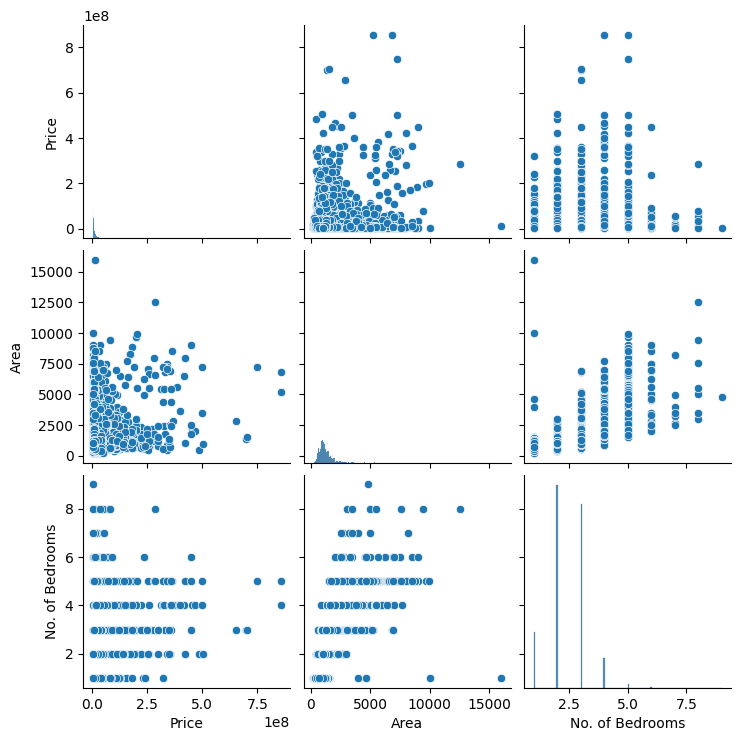

In [ ]:
sns.pairplot(house_data, diag_kind="hist")

- En la diagonal principal se muestra la distribucion de cada variable continua, se puede apreciar una cola a la izquierda en cada una.

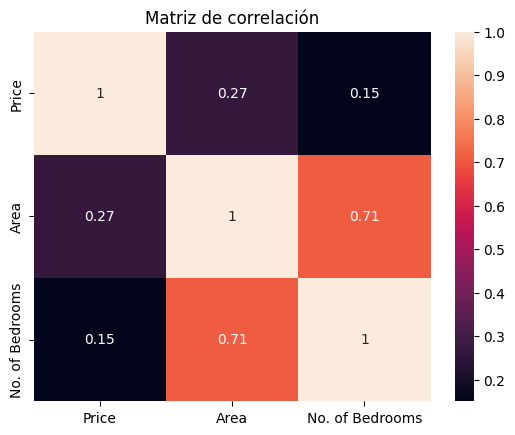

<Figure size 800x800 with 0 Axes>

In [ ]:
matriz_correlacion = house_data.corr(numeric_only=True)
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de correlación")
plt.figure(figsize=(8, 8))
plt.show()

- 📊 Hay una correlación positiva moderada entre 'Price' y 'Area'. El precio puede cambiar si se cambia el 'Area'
- 📊 Correlación débil entre 'Price' y 'No. Of Bedrooms'. La cantidad de habitaciones no cambia tanto el precio de la casa.
- 📊 Se tiene una correlación fuerte entre 'Area' y 'No. Of Bedrooms'. Si se cambia el area de la casa es probable que el número de habitaciones aumente.

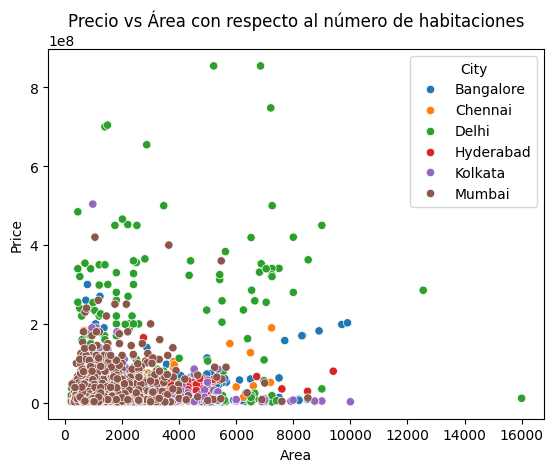

In [ ]:
sns.scatterplot(x='Area', y='Price', data=house_data, hue='City')
plt.title('Precio vs Área con respecto al número de habitaciones')
plt.show()

- 🏠 Las casas en Delhi son las más caras.
- 🏠 Mumbai y Kolkata tienen las casas más baratas.
- 🏠 La mayoría de casas tienen un Area de 0 a 6000

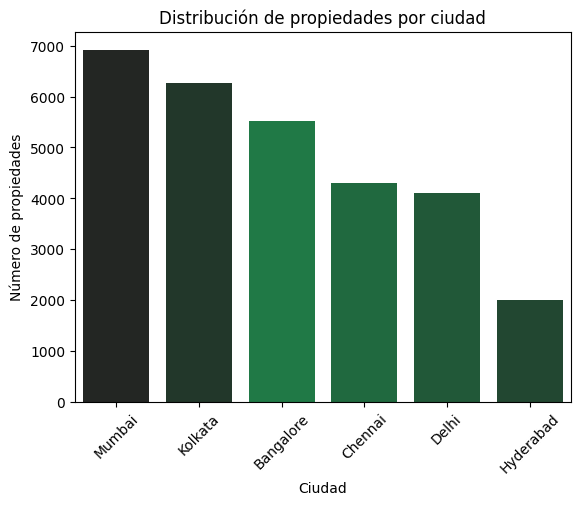

In [ ]:
sns.countplot(x='City', data=house_data, order=house_data['City'].value_counts().index, hue='City', palette='dark:#184_r')
plt.title('Distribución de propiedades por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Número de propiedades')
plt.xticks(rotation=45)
plt.show()

- 🏠 Hay aproximadamente 4000 ofertas de casas en Delhi
- 🏠 Hyderabad tiene la menor oferta, aunque no afecta al precio.

## **🔎 Detección de datos atipicos**

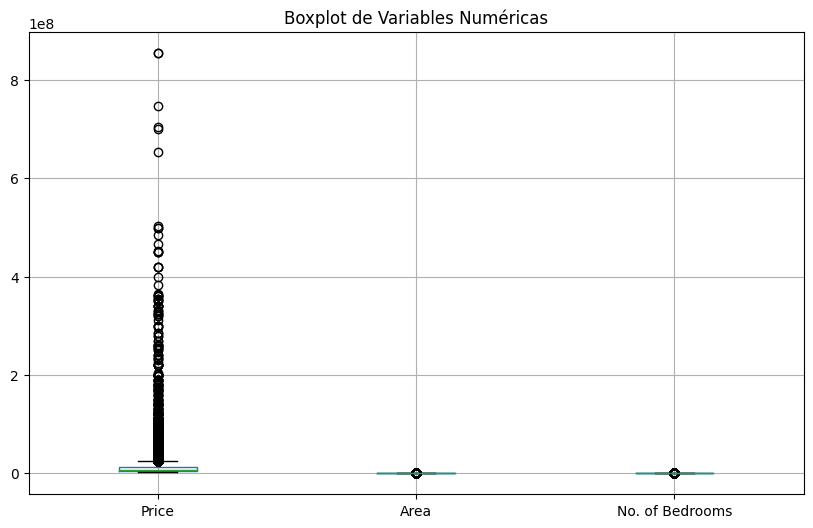

In [ ]:
# Visualizar boxplots de variables numéricas
plt.figure(figsize=(10, 6))
house_data.boxplot(column=['Price', 'Area', 'No. of Bedrooms'])
plt.title('Boxplot de Variables Numéricas')
plt.show()

- 👀 Vemos que la variable precio tienes valores atipicos, esto es problematico para el modelo ya que puede generar interpretaciones engañosas.

In [ ]:
# Identificación de atípicos
Q1 = house_data.iloc[:, 2:].quantile(0.25, numeric_only=True)
Q3 = house_data.iloc[:, 2:].quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

izquierda, derecha = house_data.iloc[:, 2:].align(Q1 - 1.5 * IQR, axis=1, copy=False)
valores_atipicos_bajos = (izquierda < derecha)

izquierda, derecha = house_data.iloc[:, 2:].align(Q3 + 1.5 * IQR, axis=1, copy=False)
valores_atipicos_altos = (izquierda > derecha)

atipicos = (valores_atipicos_bajos | valores_atipicos_altos).any(axis=1)

In [ ]:
atipicos.value_counts()

False    27425
True      1710
dtype: int64

👓 Vemos que existen 1710 datos atipicos, los cuales puedes afectar al modelo.

In [ ]:
house_data[atipicos].head()

,City,Price,Area,Location,No. of Bedrooms
0,Bangalore,30000000,3340,JP Nagar Phase 1,4
6,Bangalore,20000000,2502,Thanisandra,4
22,Bangalore,23700000,2470,Sahakar Nagar,4
29,Bangalore,23100000,2480,Banashankari,3
60,Bangalore,51000000,3500,Hebbal,3


⛔ Algunas observaciones de los datos atipicos encontrados en el conjunto de datos.

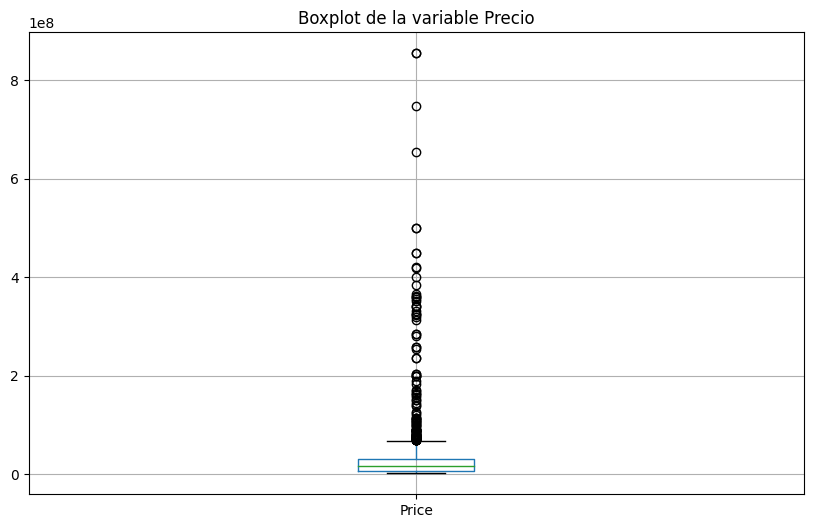

In [ ]:
plt.figure(figsize=(10, 6))
house_data[atipicos].boxplot(column=['Price'])
plt.title('Boxplot de la variable Precio')
plt.show()

## **👷Trabajando con el conjunto de datos sin atipicos**

In [ ]:
# Conteo original de filas
filas_original = house_data.shape[0]

# Eliminación de atípicos
data_sin_atipicos = house_data[~atipicos]

# Conteo de filas después de eliminar atípicos
filas_despues = data_sin_atipicos.shape[0]

filas_original, filas_despues

(29135, 27425)

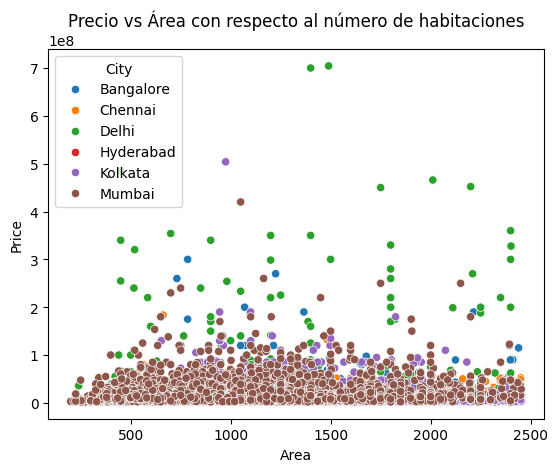

In [ ]:
sns.scatterplot(x='Area', y='Price', data=data_sin_atipicos, hue='City')
plt.title('Precio vs Área con respecto al número de habitaciones')
plt.show()

- ✂️ Ahora el área de las casas están en un rango de 0 a 2500
- ✂️ Las casas más caras siguen siendo las de Delhi

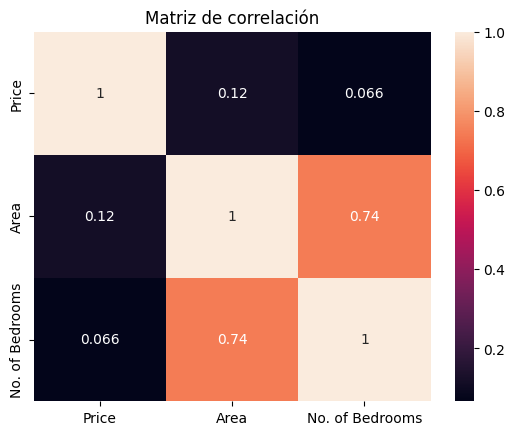

<Figure size 800x800 with 0 Axes>

In [ ]:
matriz_correlacion = data_sin_atipicos.corr(numeric_only=True)
sns.heatmap(matriz_correlacion, annot=True)
plt.title("Matriz de correlación")
plt.figure(figsize=(8, 8))
plt.show()

- 📊 Ahora la correlación entre 'Price' y 'No. Of Bedrooms' es más baja/débil.
- 📊 La correlación entre 'Price' y 'Area' pasó de moderada a débil.

### **⌨️ Codificación de variables categoricas**

In [ ]:
# Separación de datos categóricos
datos_categoricos = data_sin_atipicos.select_dtypes(include=['object'])
datos_categoricos

# Transformar las variables categoricas a numericas
# Sacar conclusiones con los dos modelos con y sin atipicos
# Agrupar los barrios en categorias más grandes

,City,Location
1,Bangalore,Dasarahalli on Tumkur Road
2,Bangalore,Kannur on Thanisandra Main Road
3,Bangalore,Doddanekundi
4,Bangalore,Kengeri
5,Bangalore,Horamavu
...,...,...
29130,Mumbai,Mira Road East
29131,Mumbai,Naigaon East
29132,Mumbai,Shirgaon
29133,Mumbai,Mira Road East


- 🔎 Las variables 'City' y 'Location' son las variables categoricas de esta base de datos

In [ ]:
# Crear un diccionario de recuentos de ubicaciones por ciudad
city_location_counts = {}
for city_name, city_group in data_sin_atipicos.groupby('City'):
    location_counts = city_group['Location'].value_counts()
    city_location_counts[city_name] = location_counts

# Convertir el diccionario en un DataFrame
city_location_counts = pd.DataFrame(city_location_counts)

data_sin_atipicos_copy = data_sin_atipicos.copy()

# Inicializar una columna nueva para cada ciudad en el dataframe original con el sufijo "_L"
for city_name in city_location_counts.columns:
    # Modificar el nombre de la columna
    new_column_name = city_name + "_L"
    data_sin_atipicos_copy[new_column_name] = 0

# Asignar 1 a las ubicaciones que pertenecen a cada ciudad correspondiente
for index, row in data_sin_atipicos_copy.iterrows():
    city = row['City']
    location = row['Location']
    if location in city_location_counts.index:
        # Modificar el nombre de la columna
        new_column_name = city + "_L"
        data_sin_atipicos_copy.loc[index, new_column_name] = 1

# Eliminar la columna 'Location', ya que ahora está representada por las columnas de las ciudades
data_sin_atipicos_copy.drop(['Location'], axis=1, inplace=True)

# Mostrar las primeras filas del dataframe actualizado
data_sin_atipicos_copy.head()

,City,Price,Area,No. of Bedrooms,Bangalore_L,Chennai_L,Delhi_L,Hyderabad_L,Kolkata_L,Mumbai_L
1,Bangalore,7888000,1045,2,1,0,0,0,0,0
2,Bangalore,4866000,1179,2,1,0,0,0,0,0
3,Bangalore,8358000,1675,3,1,0,0,0,0,0
4,Bangalore,6845000,1670,3,1,0,0,0,0,0
5,Bangalore,6797000,1220,2,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

'''
0 Bangalore
1 Chennai
2 Delhi
3 Hyderabad
4 Kolkata
5 Mumbai
'''

# Vamos a ponerle un número único para identificar cada ciudad
le = LabelEncoder()

# Codificando la columna 'City'
data_sin_atipicos_copy["City_Encoded"] = le.fit_transform(data_sin_atipicos_copy["City"])
data_sin_atipicos_copy = data_sin_atipicos_copy.drop(['City'], axis=1)
data_sin_atipicos_copy = data_sin_atipicos_copy.rename(columns={'City_Encoded': 'City'})

data_sin_atipicos_copy.head()

,Price,Area,No. of Bedrooms,Bangalore_L,Chennai_L,Delhi_L,Hyderabad_L,Kolkata_L,Mumbai_L,City
1,7888000,1045,2,1,0,0,0,0,0,0
2,4866000,1179,2,1,0,0,0,0,0,0
3,8358000,1675,3,1,0,0,0,0,0,0
4,6845000,1670,3,1,0,0,0,0,0,0
5,6797000,1220,2,1,0,0,0,0,0,0


In [ ]:
dataframe_onehot = data_sin_atipicos_copy.copy()
dataframe_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27425 entries, 1 to 29134
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            27425 non-null  int64
 1   Area             27425 non-null  int64
 2   No. of Bedrooms  27425 non-null  int64
 3   Bangalore_L      27425 non-null  int64
 4   Chennai_L        27425 non-null  int64
 5   Delhi_L          27425 non-null  int64
 6   Hyderabad_L      27425 non-null  int64
 7   Kolkata_L        27425 non-null  int64
 8   Mumbai_L         27425 non-null  int64
 9   City             27425 non-null  int64
dtypes: int64(10)
memory usage: 3.3 MB


### **🔎 Analisis de variables**

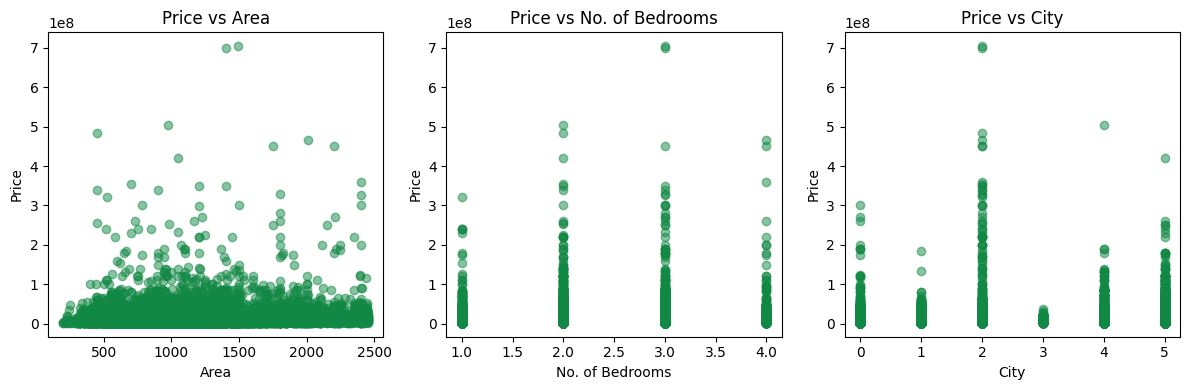

In [ ]:
# Gráficos de dispersión
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(dataframe_onehot['Area'], dataframe_onehot['Price'], alpha=0.5, color='#184')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')

plt.subplot(1, 3, 2)
plt.scatter(dataframe_onehot['No. of Bedrooms'], dataframe_onehot['Price'], alpha=0.5, color='#184')
plt.title('Price vs No. of Bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')

plt.subplot(1, 3, 3)
plt.scatter(dataframe_onehot['City'], dataframe_onehot['Price'], alpha=0.5, color='#184')
plt.title('Price vs City')
plt.xlabel('City')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

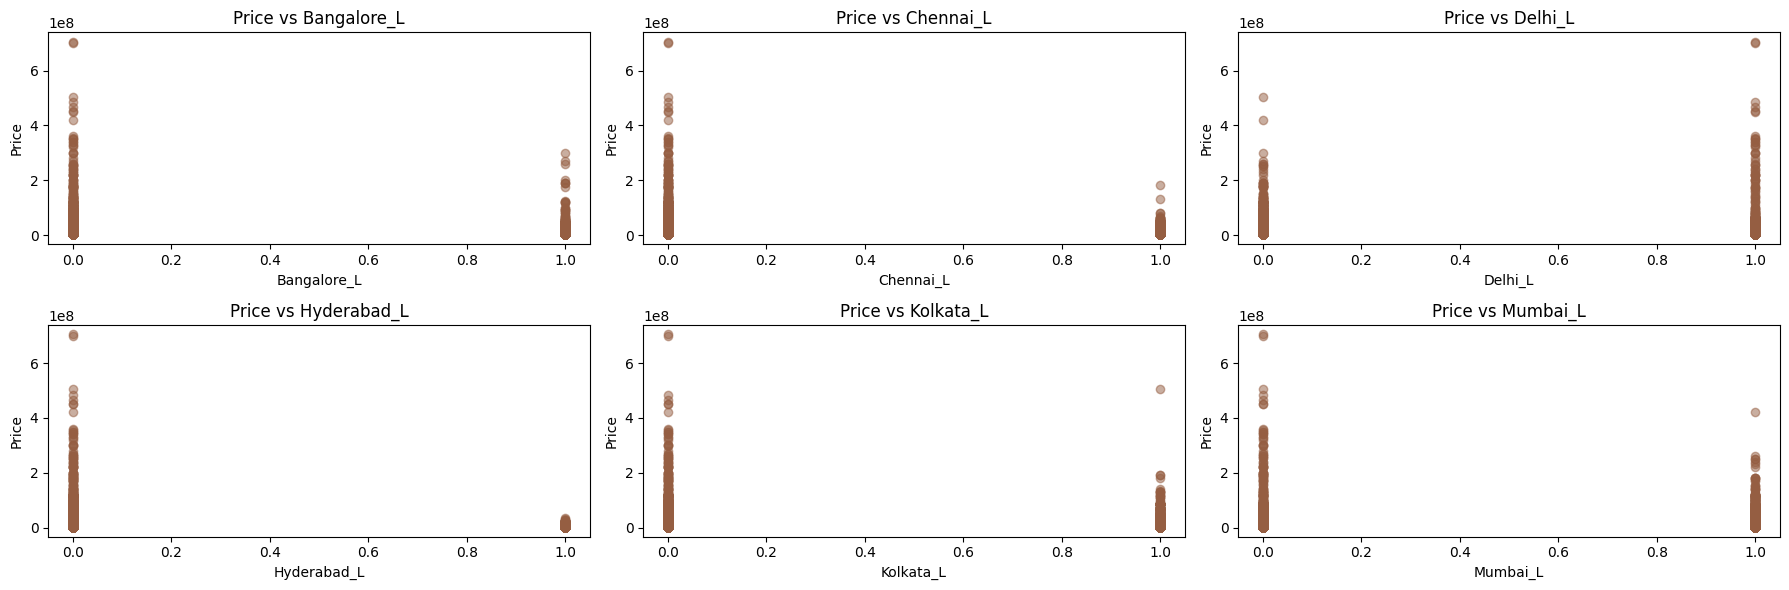

In [ ]:
# Gráficos de dispersión
plt.figure(figsize=(18, 6))

for i, city in enumerate(['Bangalore_L', 'Chennai_L', 'Delhi_L', 'Hyderabad_L', 'Kolkata_L', 'Mumbai_L']):
    plt.subplot(2, 3, i+1)
    plt.scatter(dataframe_onehot[city], dataframe_onehot['Price'], alpha=0.5, color='#955E42')
    plt.title(f'Price vs {city}')
    plt.xlabel(city)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

❗ Cuando el valor es 0, significa que la ubicación no pertenece a esa ciudad.   
❗ Cuando el valor es 1, significa que la ubicación pertenece a esa ciudad.

- **Bangalore**: Hay una correlación positiva débil entre el área y el precio.
- **Chennai**: Hay una correlación positiva muy débil entre el número de dormitorios y el precio.
- **Delhi**: Hay una correlación negativa débil entre el área y el precio.
- **Hyderabad**: No hay una correlación clara entre el área y el precio.
- **Kolkata**: Hay una correlación positiva débil entre el número de dormitorios y el precio.
- **Mumbai**: Hay una correlación positiva débil entre el área y el precio.

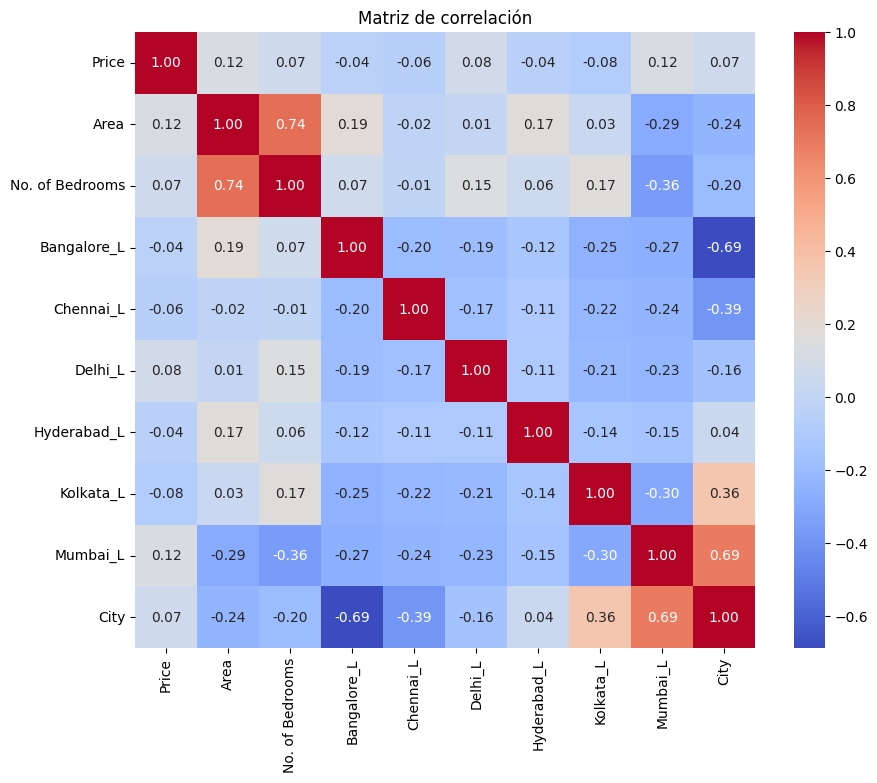

In [ ]:
# Matriz de correlación
correlation_matrix = dataframe_onehot.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()



* 🏠**Área**: La correlación entre el área y el precio es de 0,12. Esto indica una
 correlación positiva débil entre las dos variables. Significa; a medida que aumenta el área, el precio tiende a aumentar también.
* 🗺️**Ubicación**: La correlación entre la ubicación y el precio varía según la ciudad. Por ejemplo, la correlación entre la ubicación en Bangalore y el precio es de -0,04, mientras que la correlación entre la ubicación en Mumbai y el precio es de 0,12. Esto indica que la relación entre la ubicación y el precio varía según la ciudad.



## **🦾Entrenamiento del modelo**

In [ ]:
X = dataframe_onehot.loc[:, dataframe_onehot.columns != 'Price']
Y = dataframe_onehot['Price']

print(f"Tamaño de X: {X.shape}\n")
print(f"Tamaño de Y: {Y.shape}")

Tamaño de X: (27425, 9)

Tamaño de Y: (27425,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [ ]:
X_train

,Area,No. of Bedrooms,Bangalore_L,Chennai_L,Delhi_L,Hyderabad_L,Kolkata_L,Mumbai_L,City
15729,1100,2,0,0,0,1,0,0,3
15767,2115,3,0,0,0,1,0,0,3
22870,1225,2,0,0,0,0,0,1,5
25664,1125,2,0,0,0,0,0,1,5
14491,1875,3,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...
14157,680,1,0,0,0,1,0,0,3
21131,950,2,0,0,0,0,1,0,4
10612,600,2,0,0,1,0,0,0,2
11590,540,2,0,0,1,0,0,0,2
